# Lab 4

### SOLUTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal

%matplotlib inline

---
## Harmonic Sinusoids

Sounds can be synthesized by summing harmonic sinusoids. The following
function can do just that, taking a fundamental frequency, a vector containing the individual amplitudes of each harmonic, the sampling frequency, and the duration of the output to be generated.


In [7]:
def sinesum(f0, k, fs, dur):
    '''this function synthesizes a sum of sine waves with the following parameters:
        f0 = fundamental frequncy in Hz
        k = vector of harmonic amplitudes
        fs = the sampling rate in Hz
        dur = total time duration of signal in seconds.'''
    
    k = np.array(k)
    numFreqs = len(k)
    
    freq = f0*np.arange(1,numFreqs+1)
    t = np.linspace(0,dur,int(dur*fs))
    
    #########################
    # PROBLEM 3 ANSWER HERE
    
    for i in range(len(k)):
        if freq[i] >= (fs/2):
            k[i] = 0
            
    #########################
    
    
    freq.shape = (1, numFreqs)
    k.shape = (numFreqs, 1)
    t.shape = (int(dur*fs), 1)
    
    # Generate matrix of sinusoids
    X = np.sin(2 * np.pi * t * freq)
    
    # Weight by magnitude vector k and sum
    XX = np.dot(X, k)
    
    return np.squeeze(XX)

### Problem 1
Create a sound using the sinesum function with the following parameters:
- Sampling frequency $f_s = 11025$ Hz
- Fundamental frequency $f_0 = 440$ Hz
- Duration of $2$ seconds
- 30 harmonics (including the fundamental) with amplitudes $k_n$
- $k_n$ = $\frac{1}{n + 1}$ if $n$ is even, $0$ if $n$ is odd.
- For example: the amplitude $k_0$ for $f_0$ will be 1, since $k_0 = \frac{1}{1 + 0} = 1$

Plot a few periods of the signal. What type of signal is this?

### Your Answer

In [12]:
def compute_amplitude(x):
    if x % 2 == 1:
        return 0
    else:
        return 1/(x+1)
    
k = [compute_amplitude(x) for x in range(30)]

signal0 = sinesum(440, k, 11025, 2)


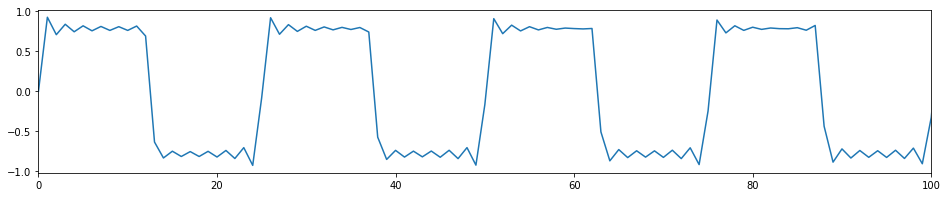

In [13]:
plt.figure(figsize = (16,3))
plt.xlim(0,100)
plt.plot(signal0);

### Problem 2
Create a signal that plays the following fundamental frequencies in order: $440$, $494$, $553$, $587$, $659$, $740$, $831$, $880$ Hz. Each $f_0$ should last for a duration of 0.4 seconds. Use the same amplitude vector you created for Problem 1. Again, use a sampling rate $f_s = 11025$. Listen to your result.

*Hint: Begin with the provided empty array, and use np.concatenate to add each new section. You may need to use np.expand_dims on the output of sinesum.*

### Your Answer

In [14]:
signal1 = np.zeros((0,1))
notes = [440, 494, 553, 587, 659, 740, 831, 880]

for i in range(8):
    f0 = notes[i]
    signal_i= sinesum(f0, k, 11025, 0.4)
    signal_i = np.expand_dims(signal_i, axis=1)
    signal1 = np.concatenate((signal1, signal_i))

In [15]:
ipd.Audio(np.squeeze(signal1), rate=11025)

### Problem 3

You may notice distortion in the previous signal. Why is this happening? Leaving the sampling rate fixed, change the sinesum function above so that it removes all unwanted frequencies. Listen to the new sound.